In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1') # Try 'latin-1' encoding





In [ ]:

df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:

df.isnull().sum()


df.duplicated().sum()


6

In [ ]:

for col in df.select_dtypes(include=['number']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.apply(pd.to_numeric, errors='coerce')


df.fillna(df.mean(), inplace=True)

In [ ]:
# Check the column names
df.columns


Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

In [ ]:
# Get the actual column names in your DataFrame
print(df.columns)

# Assuming your columns are named 'genre', 'director', and 'actors' (lowercase),
# update the pd.get_dummies call:
df = pd.get_dummies(df, columns=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Actor 1', 'Actor 2',
       'Actor 3'], drop_first=True)

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')


In [ ]:

X = df.drop('Rating', axis=1, errors='ignore')

y = df['Rating_8.8']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:

y_pred = model.predict(X_test)


In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 4.9288124930455466e-08
R-Squared: 0.9998470589324465


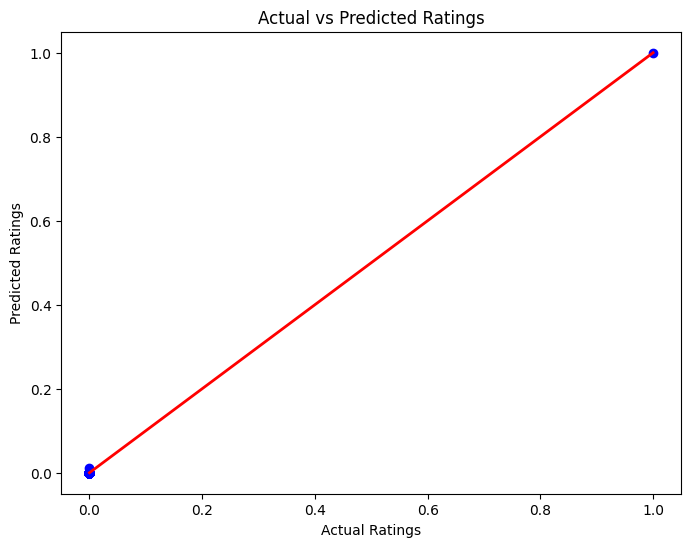

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


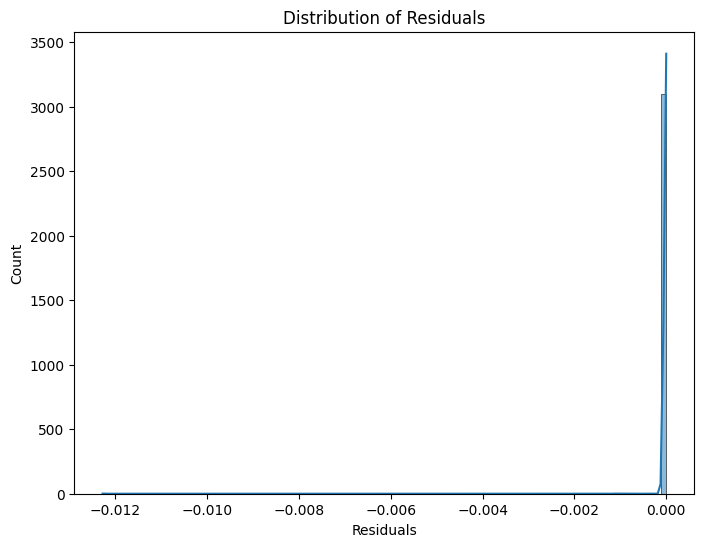

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_test_numeric = y_test.astype(float)
residuals = y_test_numeric - y_pred

if np.any(np.isinf(residuals)) or np.any(np.isnan(residuals)):
    print("Warning: Residuals contain infinity or NaN values. These will be removed.")
    residuals = residuals[np.isfinite(residuals)]


plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=100)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'movie_rating_predictor.pkl')


['movie_rating_predictor.pkl']